In [1]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from tensorflow.keras.layers import RandomFlip, RandomRotation
from keras_cv.layers import RandAugment

E0000 00:00:1732352099.589226    6038 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732352099.642053    6038 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.18.0


## Cleaning Outliers

In [5]:
data = np.load('training_set.npz')
X = data['images']
y = data['labels']

In [6]:
# Indices for the troll images (known examples from observation)
shrekIdx = 12691
manIdx = 13610

def image_batch_generator(X, batch_size=32, target_size=(224, 224)):
    num_samples = X.shape[0]
    for start in range(0, num_samples, batch_size):
        end = min(start + batch_size, num_samples)
        batch_images = []
        for img in X[start:end]:
            img_resized = tf.image.resize(img, target_size)
            img_resized = preprocess_input(img_resized)  
            batch_images.append(img_resized)
        yield np.array(batch_images)

In [7]:
vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
vgg16.trainable = False

X_features_list = []
batch_size = 256  
generator = image_batch_generator(X, batch_size=batch_size)

for batch in generator:
    features = vgg16.predict(batch)
    features_flattened = features.reshape(features.shape[0], -1)
    X_features_list.append(features_flattened)

X_features_flattened = np.vstack(X_features_list)


I0000 00:00:1732352230.803557    6038 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20750 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


I0000 00:00:1732352235.962550    6762 service.cc:148] XLA service 0x7f8aec0177d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732352235.963060    6762 service.cc:156]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
I0000 00:00:1732352236.080596    6762 cuda_dnn.cc:529] Loaded cuDNN version 90300


4/8 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

I0000 00:00:1732352245.024170    6762 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━

In [8]:
##Use cosine similartiy to detect the images that is similar to the known troll examples
from sklearn.metrics.pairwise import cosine_similarity

shrek_embedding = X_features_flattened[shrekIdx].reshape(1, -1)
man_embedding = X_features_flattened[manIdx].reshape(1, -1)

shrek_similarities = cosine_similarity(X_features_flattened, shrek_embedding).flatten()
man_similarities = cosine_similarity(X_features_flattened, man_embedding).flatten()

similarity_threshold = 0.8 #Choosen by experiments.

shrek_troll_indices = np.where(shrek_similarities >= similarity_threshold)[0]
man_troll_indices = np.where(man_similarities >= similarity_threshold)[0]

troll_indices = np.unique(np.concatenate([shrek_troll_indices, man_troll_indices]))

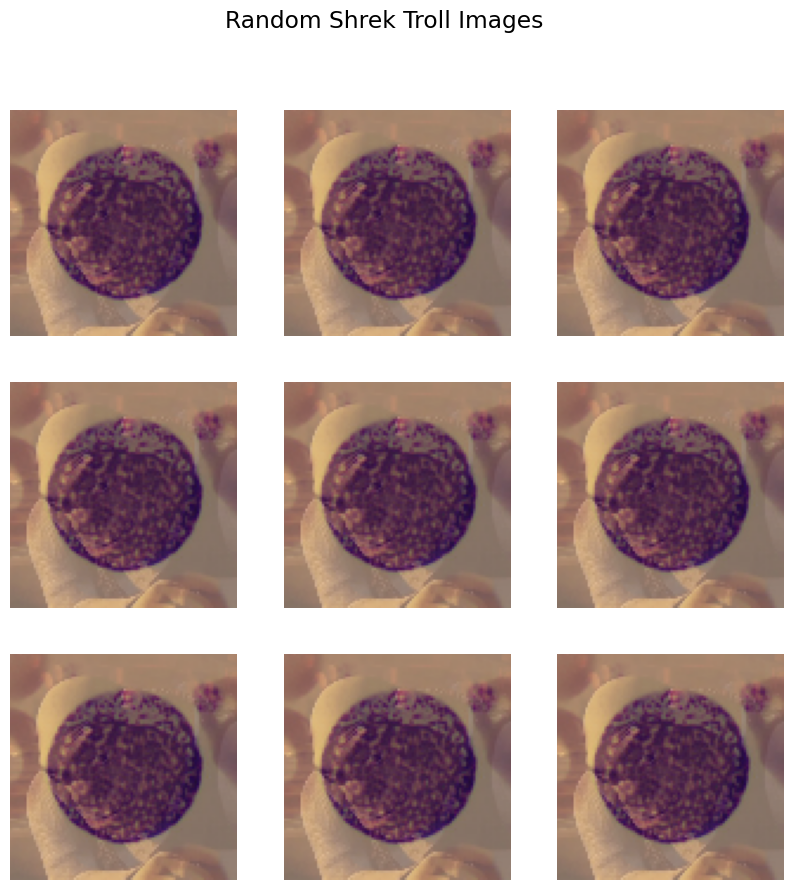

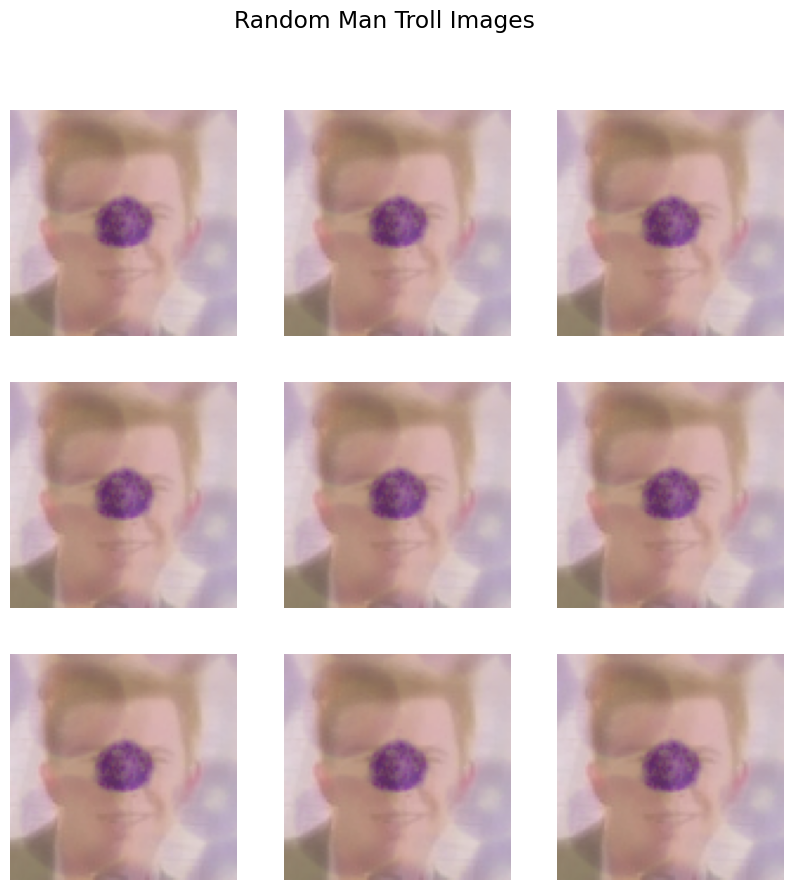

In [9]:
def plot_random_samples(indices, title, num_samples=9):
    plt.figure(figsize=(10, 10))
    random_indices = random.sample(list(indices), min(num_samples, len(indices)))

    for i, idx in enumerate(random_indices):
        plt.subplot(3, 3, i + 1)
        plt.imshow(X[idx].astype('uint8'))  # Display the original image
        plt.axis('off')

    plt.suptitle(title)
    plt.show()

plot_random_samples(shrek_troll_indices, "Random Shrek Troll Images")
plot_random_samples(man_troll_indices, "Random Man Troll Images")


In [13]:
# Remove troll images from dataset
X_cleaned = np.delete(X, troll_indices, axis=0)
y_cleaned = np.delete(y, troll_indices, axis=0)

print(f"Original dataset size: {X.shape[0]} images")
print(f"Cleaned dataset size: {X_cleaned.shape[0]} images")

Original dataset size: 13759 images
Cleaned dataset size: 11959 images


In [ ]:
np.savez("training_set_shreks_removed.npz", images=X_cleaned, labels=y_cleaned)

## Dataset balancing with little augmentation (as we use augmentation in training)

In [14]:
data = np.load('training_set_shreks_removed.npz')
X_cleaned = data['images']
y_cleaned = data['labels']

In [15]:
unique_X, idx_unique = np.unique(X_cleaned, return_index= True, axis=0)

y_cleaned_unique = y_cleaned[idx_unique]
X_cleaned_unique = X_cleaned[idx_unique]

In [16]:
label , count_label = np.unique(y_cleaned_unique, return_counts = True)

print(label)
print(count_label)

[0 1 2 3 4 5 6 7]
[ 850 2179 1085 2023  849  992 2330 1643]


In [17]:
## Make all class image counts equal to 2500.
class_labels, class_counts = np.unique(y_cleaned_unique, return_counts=True)
target_count = 2500

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(factor=(np.deg2rad(45), np.deg2rad(90))),
])

X_augmented = []
y_augmented = []

for label, count in zip(class_labels, class_counts):
    images_needed = target_count - count
    if images_needed > 0:
        X_class = X_cleaned_unique[y_cleaned_unique == label]
        X_to_augment = X_class[np.random.choice(len(X_class), images_needed, replace=True)]
        X_augmented_class = data_augmentation(X_to_augment, training=True)
        X_augmented.append(X_augmented_class)
        y_augmented.append(np.full(images_needed, label))

X_augmented = np.concatenate(X_augmented)
y_augmented = np.concatenate(y_augmented)

X_balanced = np.concatenate([X_cleaned_unique, X_augmented])
y_balanced = np.concatenate([y_cleaned_unique, y_augmented])

new_class_labels, new_class_counts = np.unique(y_balanced, return_counts=True)
print(dict(zip(new_class_labels, new_class_counts)))

{np.uint8(0): np.int64(2500), np.uint8(1): np.int64(2500), np.uint8(2): np.int64(2500), np.uint8(3): np.int64(2500), np.uint8(4): np.int64(2500), np.uint8(5): np.int64(2500), np.uint8(6): np.int64(2500), np.uint8(7): np.int64(2500)}


## Augmented dataset generation for model generalizability (not used at the end as we included this on training process)

In [ ]:
# Define the augmentation pipeline
img_augmentation = tf.keras.Sequential(
    [
        RandAugment(
            value_range=(0, 1),
            augmentations_per_image=4,
            magnitude=0.4,
            magnitude_stddev=0.15,
            rate=0.9090909090909091,
            geometric=True,
            seed=seed,
        ),
        RandomFlip(),
        RandomRotation(factor=0.5),
    ],
    name="img_augmentation",
)

from keras_cv.layers import MixUp

img_augmentation_augmix = tf.keras.Sequential(
    [
        kcvl.AugMix(
            value_range=(0, 1),
            severity=0.25,
            seed=seed
        ),
        RandAugment(
            value_range=(0, 1),
            augmentations_per_image=2,
            magnitude=0.4,
            magnitude_stddev=0.15,
            rate=0.9090909090909091,
            geometric=True,
            seed=seed,
        ),
        RandomFlip(),
        RandomRotation(factor=0.5),
    ],
    name="img_augmentation_with_augmix",
)

# Load the dataset
data = np.load('training_set_shreks_removed.npz')
X_cleaned = data['images']
y_cleaned = data['labels']
X_cleaned_normalized = X_cleaned.astype("float32") / 255.0

def augment_dataset_to_target(X, y, target_count, augmentation_pipeline):
    classes, class_counts = np.unique(y, return_counts=True)
    X_augmented, y_augmented = list(X), list(y)

    for class_label, class_count in tqdm(zip(classes, class_counts), total=len(classes), desc="Augmenting classes"):
        if class_count >= target_count:
            continue

        class_indices = np.where(y == class_label)[0]
        class_images = X[class_indices]

        num_needed = target_count - class_count
        while num_needed > 0:
            augmented_images = augmentation_pipeline(class_images).numpy()
            if len(augmented_images) > num_needed:
                augmented_images = augmented_images[:num_needed]

            X_augmented.extend(augmented_images)
            y_augmented.extend([class_label] * len(augmented_images))
            num_needed -= len(augmented_images)

    return np.array(X_augmented), np.array(y_augmented)

In [ ]:
#### Augment dataset to balance all classes to the target count
target_count = 6000
num_classes = len(np.unique(y_cleaned)) 

In [ ]:
X_balanced, y_balanced = augment_dataset_to_target(X_cleaned_normalized, y_cleaned, target_count, img_augmentation_augmix)
X_balanced = (X_balanced * 255).astype(np.uint8)

In [ ]:
np.savez('balanced_dataset_leaves_augmented_augmix_48000_v2.npz', images=X_balanced, labels=y_balanced)